## Algoritma Kompetisi_Tak_Terbatas

1. initialize t,w,B,h,w,delta_t,simulation_length
2. while t<simulation_length do
        W:= W + (h*W_old-w*B*W_old)*delta_t
        B:= B + (l*B-b*B*W_old)*delta_t
3. display (t,W,B)
4. t <- t+delta_t

Text(0, 0.5, '$populasi$')

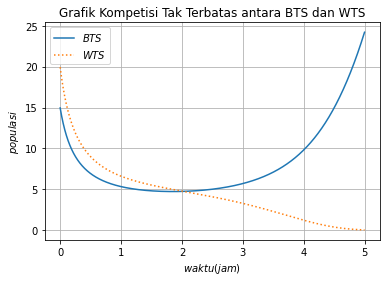

In [ ]:
# Program
# Inisiasi
import matplotlib.pyplot as plt
import pandas as pd

BTS_population = 15
BTS_birth_fraction = 1
BTS_death_proportionality = 0.2
WTS_population = 20
WTS_birth_fraction = 1
WTS_death_proportionality = 0.27
simulation_length = 5 #dalam jam
delta_t = 0.001 #dalam jam

numIteration = int(simulation_length/delta_t)
# Array
arr_t = [0 for i in range(numIteration)]
arr_BTS = [0 for i in range(numIteration)]
arr_WTS = [0 for i in range(numIteration)]

# looping
for i in range(numIteration):
    birth_BTS = BTS_birth_fraction*BTS_population
    death_BTS = BTS_death_proportionality*BTS_population*WTS_population
    BTS_population = BTS_population + (birth_BTS-death_BTS)*delta_t
    arr_BTS[i] = BTS_population

    birth_WTS = WTS_birth_fraction*WTS_population
    death_WTS = WTS_death_proportionality*BTS_population*WTS_population
    WTS_population = WTS_population + (birth_WTS-death_WTS)*delta_t
    arr_WTS[i] = WTS_population
  
    t = i*delta_t
    arr_t[i] = t

# Print Grafik
plt.title("Grafik Kompetisi Tak Terbatas antara BTS dan WTS")
plt.plot(arr_t,arr_BTS,label='$BTS$')
plt.plot(arr_t,arr_WTS,':',label='$WTS$')
plt.grid(True)
plt.legend()
plt.xlabel('$waktu(jam)$')
plt.ylabel('$populasi$')


## Algoritma Kompetisi Terbatas

1. initialize t,w,B,h,W,delta_t,simulation_length, Kw, Kb
2. numIteration := simulation_length/delta_t
3. change_in_WTS := (1-W/Kw)*(h*W-w*B*W)
4. change_in_BTS := (1-B/Kb)*(l*B-b*B*W)
5. for i from 0 through numIterations do the following
        t := i*delta_t
        W := W + (change_in_WTS)*delta_t
        B := B + (change_in_BTS)*delta_t
        change_in_WTS := (1-W/Kw)*(h*W-w*B*W)
        change_in_BTS := (1-B/Kb)*(l*B-b*B*W)
        display (t,W,B)
   end
6. Stop

     waktu  populasi_WTS  populasi_BTS
0      0.0  8.000000e+01     60.000000
1      1.0  7.756800e+01     58.714286
2      2.0  7.498359e+01     57.340402
3      3.0  7.226705e+01     55.888929
4      4.0  6.944316e+01     54.373206
..     ...           ...           ...
496  496.0  3.789830e-26     67.946734
497  497.0  3.132460e-26     67.966664
498  498.0  2.588947e-26     67.986407
499  499.0  2.139601e-26     68.005964
500  500.0  1.768132e-26     68.025336

[501 rows x 3 columns]


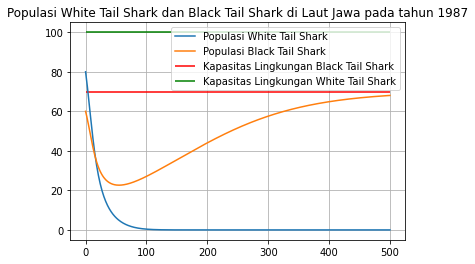

In [ ]:
# Program
import matplotlib.pyplot as plt
import pandas as pd

def Competition_Limited (simulation_length,delta_t):
    # Input
    numIteration = int(simulation_length/delta_t) + 1
    BTS_population = 60
    BTS_birth_fraction = 1
    BTS_death_proportionality = 0.2
    WTS_population = 80
    WTS_birth_fraction = 1
    WTS_death_proportionality = 0.27
    BTS_capacity_maximum = 70
    WTS_capacity_maximum = 100
    
    # Persamaan
    change_in_WTS = (1-(WTS_population/WTS_capacity_maximum))*(WTS_birth_fraction*WTS_population - WTS_death_proportionality*BTS_population*WTS_population)
    change_in_BTS = (1-(BTS_population/BTS_capacity_maximum))*(BTS_birth_fraction*BTS_population - BTS_death_proportionality*BTS_population*WTS_population)
    
    # Array
    arr_t = [0 for i in range(numIteration)]
    arr_BTS = [0 for i in range(numIteration)]
    arr_WTS = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_BTS[0] = BTS_population
    arr_WTS[0] = WTS_population
    # LOOPING
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = i
        WTS_population = WTS_population + change_in_WTS*delta_t
        arr_WTS[i] = WTS_population
        BTS_population = BTS_population + change_in_BTS*delta_t
        arr_BTS[i] = BTS_population
        
        change_in_WTS = (1-(WTS_population/WTS_capacity_maximum))*(WTS_birth_fraction*WTS_population - WTS_death_proportionality*BTS_population*WTS_population)
        change_in_BTS = (1-(BTS_population/BTS_capacity_maximum))*(BTS_birth_fraction*BTS_population - BTS_death_proportionality*BTS_population*WTS_population)
    return(arr_t,arr_WTS,arr_BTS)

BTS_capacity_maximum = 70
WTS_capacity_maximum = 100

df = pd.DataFrame(Competition_Limited(5,0.01))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi_WTS',2:'populasi_BTS'})
print(df)

plt.title("Populasi White Tail Shark dan Black Tail Shark di Laut Jawa pada tahun 1987")
plt.plot(df.waktu,df.populasi_WTS,label = "Populasi White Tail Shark")
plt.plot(df.waktu,df.populasi_BTS,label = "Populasi Black Tail Shark")
plt.hlines(BTS_capacity_maximum,0,500,label = "Kapasitas Lingkungan Black Tail Shark",color = "red")
plt.hlines(WTS_capacity_maximum,0,500,label = "Kapasitas Lingkungan White Tail Shark",color = "green")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fungsi(x,y):
    f = (2 * x**3) - (12 * x**2) + (20 * x) - 8.5
    return f

#dx = np.array ([0.5,0.1,0.05,0.01])
#bawah = 0
#atas = 4
#while i < len.array dx :
#n = (int)((atas-bawah) / dx) + 1
dx = [0.5,0.1,0.05,0.01] # Lebar grid
bawah = 0
atas = 4

n = [0 for i in range(len(dx))]
for i in range (len(dx)):
  n[i] = (int)((atas-bawah) / dx[i]) + 1 #N

print("n ",n)

for j in range(len(dx)):
  x[i] = np.linspace(0,4,num=n[i])      #X

y = np.array([-1.21875, 0.24605, 0.599501, 0.915])    #Y

print(x)

#-------------------------------------------
#Euler
ye = np.zeros(n)
ye[0] = 1
for i in range (n-1):
  ye[i+1] = ye[i] + dx[i] * fungsi(x[i], ye[i])

print(ye)
#-------------------------------------------
#-------------------------------------------
#Heun
yh = np.zeros(n)
yh[0] = 1
for i in range(n-1):
    k1 = fungsi(x[i], yh[i])
    k2 = fungsi(x[i]+dx, yh[i]+dx * k1)
    yh[i+1] = yh[i] + dx * (k1 + k2) / 2;

print(yh)
#-------------------------------------------
#-------------------------------------------
#Runge Kutta
#-------------------------------------------
yrk = np.zeros(n)
yrk[0] = 1
for i in range (n-1):
    k1 = fungsi(x[i], yrk[i])
    k2 = fungsi(x[i] + 0.5 * dx, y[i] + 0.5 * dx * k1)
    k3 = fungsi(x[i] + 0.5 * dx, y[i] + 0.5 * dx * k2)
    k4 = fungsi(x[i] + dx, y[i] + dx * k3)
    yrk[i+1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * dx)/6

print(yrk)
#-------------------------------------------

fig, ax = plt.subplots()
ax.plot(x,y,"k", label = "analitik")
ax.plot(x,ye,"r", label = "Euler")
ax.plot(x,yh,"b", label = "Heun")
ax.plot(x,yrk,"g--", label = "Runge Kutta")
legend = ax.legend()
plt.show()




n  [9, 41, 81, 401]


ValueError: ignored

x [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
ye [1.    5.25  5.875 5.125 4.5   4.75  5.875 7.125 7.   ]
yh [1.     3.4375 3.375  2.6875 2.5    3.1875 4.375  4.9375 3.    ]
yrk [1.      3.21875 3.      2.21875 2.      2.71875 4.      4.71875 3.     ]


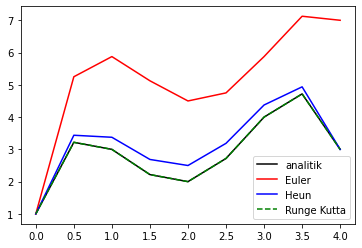

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fungsi(x,y):
    output = -2 * np.power(x,3) + 12 * np.power(x,2) - 20 * x + 8.5
    return output

dx = 0.5
bawah = 0
atas = 4
n = (int)((atas-bawah) / dx) + 1

x = np.linspace(0,4,num=n)
y = np.array([1.0, 3.21875, 3.0, 2.21875, 2.0, 2.71875, 4.0, 4.71875, 3.0])

print("x",x)

#-------------------------------------------
#Euler
ye = np.zeros(n)
ye[0] = 1
for i in range (n-1):
    ye[i+1] = ye[i] + dx * fungsi(x[i], ye[i])

print("ye",ye)
#-------------------------------------------

#-------------------------------------------
#Heun
yh = np.zeros(n)
yh[0] = 1
for i in range(n-1):
    k1 = fungsi(x[i], yh[i])
    k2 = fungsi(x[i]+dx, yh[i]+dx * k1)
    yh[i+1] = yh[i] + dx * (k1 + k2) / 2;

print("yh",yh)
#-------------------------------------------
#-------------------------------------------
#Runge Kutta
#-------------------------------------------
yrk = np.zeros(n)
yrk[0] = 1
for i in range (n-1):
    k1 = fungsi(x[i], yrk[i])
    k2 = fungsi(x[i] + 0.5 * dx, y[i] + 0.5 * dx * k1)
    k3 = fungsi(x[i] + 0.5 * dx, y[i] + 0.5 * dx * k2)
    k4 = fungsi(x[i] + dx, y[i] + dx * k3)
    yrk[i+1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * dx)/6

print("yrk",yrk)
#-------------------------------------------

fig, ax = plt.subplots()
ax.plot(x,y,"k", label = "analitik")
ax.plot(x,ye,"r", label = "Euler")
ax.plot(x,yh,"b", label = "Heun")
ax.plot(x,yrk,"g--", label = "Runge Kutta")
legend = ax.legend()
plt.show()

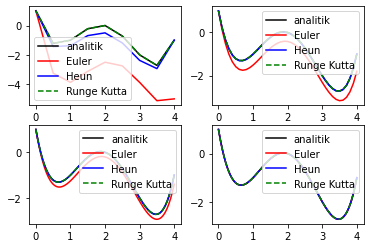

In [ ]:

#Algoritma
import numpy as np  #Mengimport data numpy sebagai np
import matplotlib.pyplot as plt #Mengimport matplotlib.pyplot sebagai plt

#Definisikan dy/dx
def fungsi(x,y):
    output = 2 * np.power(x,3) - 12 * np.power(x,2) + 20 * x - 8.5
    return output
  
# Definisikan fungsi analitik integral dy/dt
def fungsianalitik(x):
    ya= 0.5*np.power (x,4) - 4*np.power(x,3) + 10*np.power(x,2) - 8.5*x +1
    return ya

dx = [0.5,0.1,0.05,0.001] # Lebar grid
x0 = 0  # Batas bawah
xn = 4  # Batas atas
#list kosong untuk memudahkan plot
N=[]
X=[]
Y=[]
yEuleur=[]
yHeun=[]
yRungeKutta=[]

for i in range (len(dx)):   #menghitung n
    n= (int)((xn-x0) / dx[i]) + 1
    N.append(n) # memasukan hasil n ke list array
for j in range (len(N)):    # menghitung x
    x = np.linspace(0,4,num=N[j])
    X.append(x) # memasukan hasil x ke list array
 #  Analitik
for k in range (len(N)):    # menghitung y analitik
    y= fungsianalitik(X[k])
    Y.append(y)     # memasukan y ke list array

for k in range (len(N)):
    ye = np.zeros(N[k])
    ye[0] = 1
    Xarray= X[k]
    Yarray= Y[k]

# Euler
    for i in range (N[k]-1):
        ye[i+1] = ye[i] + dx[k] * fungsi(Xarray[i], ye[i])
    yEuleur.append(ye)
    yh = np.zeros(N[k])
    yh[0] = 1

# Heun
    for i in range(N[k] - 1):
        k1 = fungsi(Xarray[i], yh[i])
        k2 = fungsi(Xarray[i] + dx[k], yh[i] + dx[k] * k1)
        yh[i + 1] = yh[i] + dx[k] * (k1 + k2) / 2
    yHeun.append(yh)

# Runge kutta
    yrk = np.zeros(N[k])
    yrk[0] = 1
    for i in range(N[k] - 1):  # menghitung dengan metode runge kutta
        k1 = fungsi(Xarray[i], yrk[i])
        k2 = fungsi(Xarray[i] + 0.5 * dx[k], Yarray[i] + 0.5 * dx[k] * k1)
        k3 = fungsi(Xarray[i] + 0.5 * dx[k], Yarray[i] + 0.5 * dx[k] * k2)
        k4 = fungsi(Xarray[i] + dx[k], Yarray[i] + dx[k] * k3)
        yrk[i + 1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * dx[k]) / 6
    yRungeKutta.append(yrk)

# Plot
    plt.subplot(2, 2, k+1) # sub plot 4x4
    plt.plot(X[k], Y[k], "k", label="analitik") # plot untuk metode Analitik
    plt.plot(X[k], yEuleur[k], "r", label="Euler")# plot untuk metode Euler
    plt.plot(X[k], yHeun[k], "b", label="Heun") # plot untuk metode Heun
    plt.plot(X[k], yRungeKutta[k], "g--", label="Runge Kutta") # plot untuk metode Runge Kutta
    legend = plt.legend()
plt.show()